In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv("bestsellers with categories.csv")
books.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
books.shape

(550, 7)

In [6]:
book_count = books['Name'].nunique()
book_count

351

*Про скільки книг зберігає дані датасет? Відповідь: 351*

In [7]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head(2)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


## **Первинне дослідження даних**

In [8]:
missing_percentages = (books.isnull().sum() / len(books)) * 100
missing_percentages

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

*Чи є в якихось змінних пропуски? (Так / ні)*

*Відповідь: ні*

In [9]:
unique_genre = books['genre'].unique()
unique_genre

array(['Non Fiction', 'Fiction'], dtype=object)

*Які є унікальні жанри?*

*Відповідь: 'Non Fiction' та 'Fiction'*

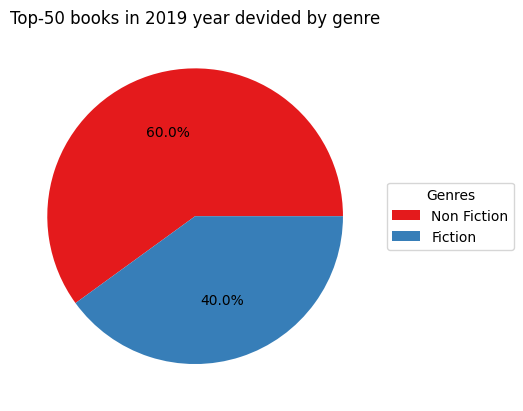

In [16]:
genre_counts = books[books['year'] == 2019]
genre_counts = genre_counts['genre'].value_counts()

wedges, texts, autotexts = plt.pie(genre_counts, autopct='%1.1f%%', colors=plt.cm.Set1.colors)
plt.legend(wedges, genre_counts.index,
           title="Genres",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Top-50 books in 2019 year devided by genre")

plt.show()

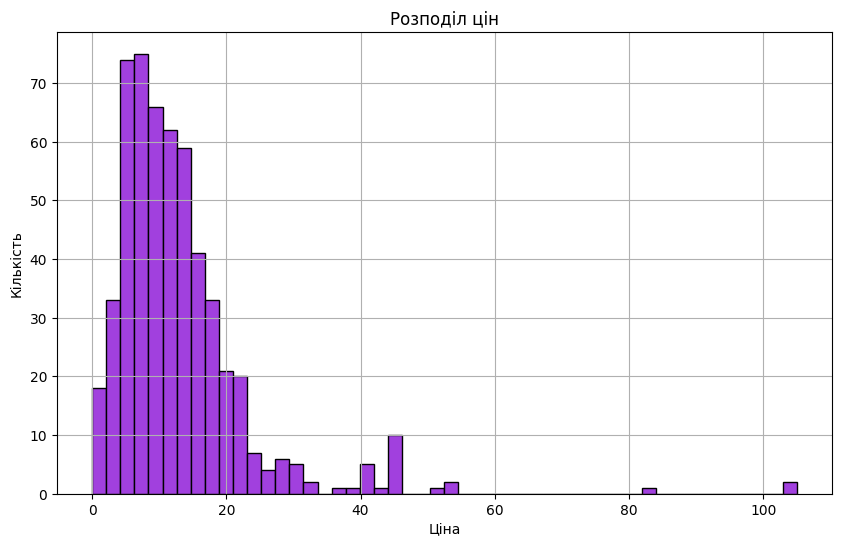

In [12]:
import matplotlib.pyplot as plt

books['price'].hist(bins=50, figsize=(10,6), color='#a140de', edgecolor='black')

plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість')

plt.show()

In [11]:
max_price = books['price'].max()
print(f"Максимальна ціна: {max_price}")

min_price = books['price'].min()
print(f"Мінімальна ціна: {min_price}")

mean_price = books['price'].mean()
print(f"Середня ціна: {mean_price}")

median_price = books['price'].median()
print(f"Медіанна ціна: {median_price}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


*Максимальна ціна? Відповідь: 105*

*Мінімальна ціна? Відповідь: 0*

*Середня ціна? Відповідь: 13,1*

*Медіанна ціна? Відповідь: 11*

## **Пошук та сортування даних**

In [12]:
max_rating = books['user_rating'].max()
max_rating

4.9

*Який рейтинг у датасеті найвищий? Відповідь: 4,9*

In [13]:
max_rating_count = books[books['user_rating'] == 4.9]

max_rating_count.shape[0]

52

*Скільки книг мають такий рейтинг?  Відповідь: 52*

In [14]:
max_reviews = books['reviews'].max()
max_reviews_book = books[books['reviews'] == max_reviews]
max_reviews_book

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


*Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing*

In [21]:
year_2015 = books[books['year'] == 2015]
year_2015_most_expencive = year_2015[year_2015['price'] == year_2015['price'].max()]
year_2015_most_expencive

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


*З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?*

*Відповідь: Publication Manual of the American Psychological Association, 6th Edition*

In [25]:
year_2010 = books[(books['year'] == 2010) & (books['genre'] == 'Fiction')]
year_2010.shape[0]

20

*Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20*

In [28]:
books_2010_2011_max_rating = books[(books['year'].isin([2010, 2011])) & (books['user_rating'] == 4.9)]
books_2010_2011_max_rating.shape[0]

1

*Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1*

In [35]:
books_2015_cheap = books[(books['year'] == 2015) & (books['price'] < 8)]
books_2015_cheap.sort_values(by='price', ascending = True).tail(3)

,name,author,user_rating,reviews,price,year,genre
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


*Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)*

## **Агрегування даних та з'єднання таблиць**

In [37]:
books_groupby_genre = books.groupby('genre')
aggr_genre = books_groupby_genre.agg(min_price=pd.NamedAgg(column='price', aggfunc='min'),
                                    max_price=pd.NamedAgg(column='price', aggfunc='max'))
aggr_genre

,min_price,max_price
genre,,
Fiction,0,82
Non Fiction,0,105


*Максимальна ціна для жанру Fiction: 82*

*Мінімальна ціна для жанру Fiction: 0*

*Максимальна ціна для жанру Non Fiction: 105*

*Мінімальна ціна для жанру Non Fiction: 0*

In [15]:
books_author = books[['author']]
agg_books_for_author = books_author.groupby('author').size().reset_index(name='book_count')
agg_books_for_author.sort_values(by='book_count', ascending=False)

,author,book_count
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10
...,...,...
61,David Grann,1
143,Larry Schweikart,1
62,David McCullough,1
141,Khaled Hosseini,1


*Якої розмірності вийшла таблиця? Відповідь: 248 рядків (авторів)*

*Який автор має найбільше книг? Відповідь: Jeff Kinney*

*Скільки книг цього автора? Відповідь: 12*

In [16]:
books_groupby_author = books.groupby('author')
agg_mean_books = books_groupby_author.agg(avg=pd.NamedAgg(column='user_rating', aggfunc='mean')).round(1)
agg_mean_books.sort_values(by='avg', ascending=False)

,avg
author,
Emily Winfield Martin,4.9
Lin-Manuel Miranda,4.9
Jill Twiss,4.9
Rush Limbaugh,4.9
Pete Souza,4.9
...,...
Paula Hawkins,4.1
Gillian Flynn,4.0
Gallup,4.0


*У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt*

*Який у цього автора середній рейтинг? Відповідь: 3.9*

In [63]:
author_concat = pd.concat([agg_books_for_author.set_index('author'), agg_mean_books], axis=1)
author_concat.sort_values(by=['book_count','avg'], ascending=[True,True])

,book_count,avg
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
...,...,...
American Psychological Association,10,4.5
Gary Chapman,11,4.7
Suzanne Collins,11,4.7


*Який автор перший у списку? Відповідь: Muriel Barbery*

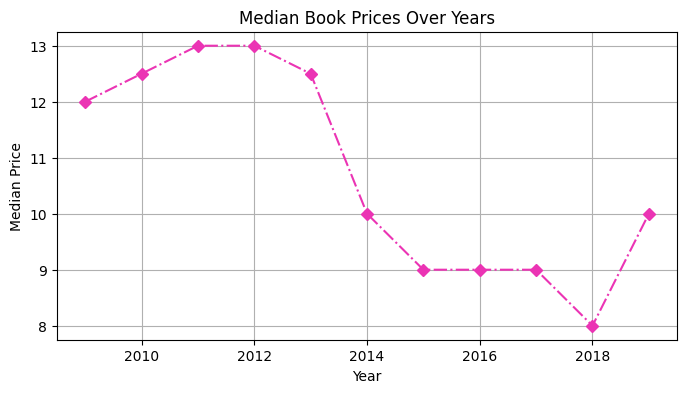

In [35]:
aggregated_df = books.groupby('year')['price'].median().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(aggregated_df['year'], aggregated_df['price'],linestyle='-.', marker='D', color='#eb34b4')
plt.title('Median Book Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()